# AED 1 🤓

In [1]:
import pandas as pd

data=pd.read_csv("data/customer_dataset.csv", sep = ",")


In [2]:
from funpymodeling.exploratory import status

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [3]:
len(data)

623

In [5]:
from funpymodeling.exploratory import freq_tbl

freq_tbl(data['paymentMethodType'])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


In [51]:
t_paymentMethodType=freq_tbl(data.paymentMethodType)

t_paymentMethodType.query("frequency<=30")['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

In [ ]:
# Casi la mitad de las rows de paymentMethodType son NULAS. 
# ¿Qué hago con eso?
# Podría hacer un getdummies con esa columna. 
# Yo no descartaría a "bitcoin".


# AED 2 😧

In [16]:
# Analizamos "fraudulent"

freq_tbl(data['fraudulent'])


,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


In [ ]:
# En esta columna también tenemos muchos NULOS --> 455, el 73%
# Me parece que también tengo que hacer un getdummies y hacer una columna para los nulos.

In [7]:
# Análisis BIVARIADO

# Quiero conocer la relacion entre fraudulent y paymentMethodType (cat vs cat)

pd.crosstab(data['fraudulent'], data['paymentMethodType'])

paymentMethodType,apple pay,bitcoin,card,paypal
fraudulent,,,,
False,11,9,75,12
True,7,6,46,2


In [20]:
# Análisis BIVARIADO

# fraudulent vs transactionFailed (categorica vs categorica)

pd.crosstab(data['fraudulent'], data['transactionFailed'], normalize=True)

transactionFailed,False,True
fraudulent,,
False,0.434524,0.202381
True,0.261905,0.101190


In [25]:
# fraudulent vs transactionAmount (numerica vs categorica)

data.groupby('fraudulent')['transactionAmount'].mean()

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

In [26]:
data.groupby('fraudulent')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


In [27]:
# orderAmount vs transactionAmount (numérica vs numérica)

data.groupby('orderAmount')['transactionAmount'].mean()

orderAmount
10.0     49.875000
11.0     37.466667
12.0     37.571429
13.0     30.500000
14.0     35.857143
           ...    
72.0     43.250000
73.0     22.500000
74.0     35.250000
75.0     33.000000
353.0    10.000000
Name: transactionAmount, Length: 67, dtype: float64

In [28]:
data.groupby('orderAmount')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
orderAmount,,,,,,,,
10.0,8.0,49.875000,17.183360,31.0,36.25,44.0,66.25,74.0
11.0,15.0,37.466667,19.671831,11.0,19.00,41.0,46.50,75.0
12.0,14.0,37.571429,13.200899,21.0,26.75,35.0,46.75,64.0
13.0,6.0,30.500000,12.973049,11.0,22.00,37.5,39.50,40.0
14.0,14.0,35.857143,16.505743,14.0,22.25,38.5,44.50,72.0
...,...,...,...,...,...,...,...,...
72.0,4.0,43.250000,16.660832,19.0,40.75,48.5,51.00,57.0
73.0,2.0,22.500000,2.121320,21.0,21.75,22.5,23.25,24.0
74.0,4.0,35.250000,22.276669,11.0,26.75,32.5,41.00,65.0


In [53]:
# Promedio de todas las variables numericas respecto a transactionAmount

data.groupby('transactionAmount').mean()

C:\Users\facuq\AppData\Local\Temp\ipykernel_1048\2963132973.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('transactionAmount').mean()


,orderAmount,transactionFailed
transactionAmount,,
10,67.300000,0.272727
11,36.500000,0.300000
12,33.071429,0.391304
13,44.000000,0.000000
14,35.000000,0.458333
...,...,...
72,30.200000,0.400000
73,42.000000,0.000000
74,29.250000,0.250000


<AxesSubplot: xlabel='transactionFailed', ylabel='transactionAmount'>

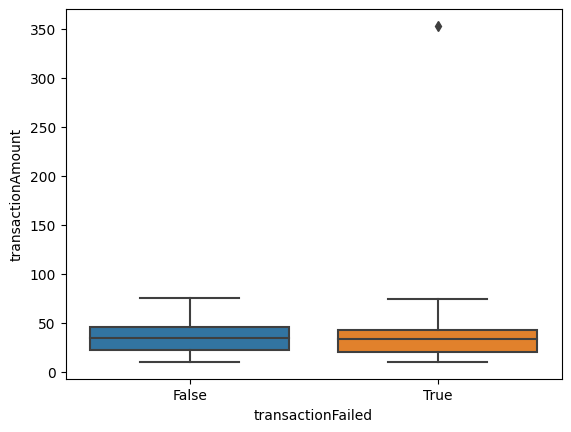

In [11]:
# Gráficos en el análisis exploratorio de datos

# Análisis de transactionAmount vs transactionFailed (num vs cat)

import seaborn as sns

sns.boxplot(y = 'transactionAmount', x = 'transactionFailed', data = data)


<AxesSubplot: xlabel='transactionFailed', ylabel='transactionAmount'>

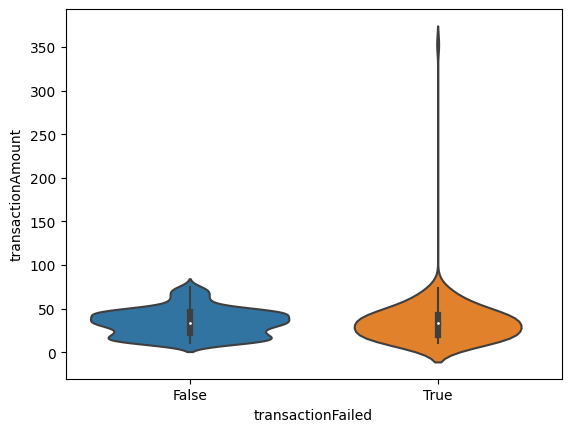

In [12]:
sns.violinplot(y = 'transactionAmount', x = 'transactionFailed', data = data)

In [13]:
# Podemos observar outliers en True. Valores numéricos de transactionAmount muy altos, respecto a la gran mayoría.

# Esos outliers podrían eliminarse del dataset.

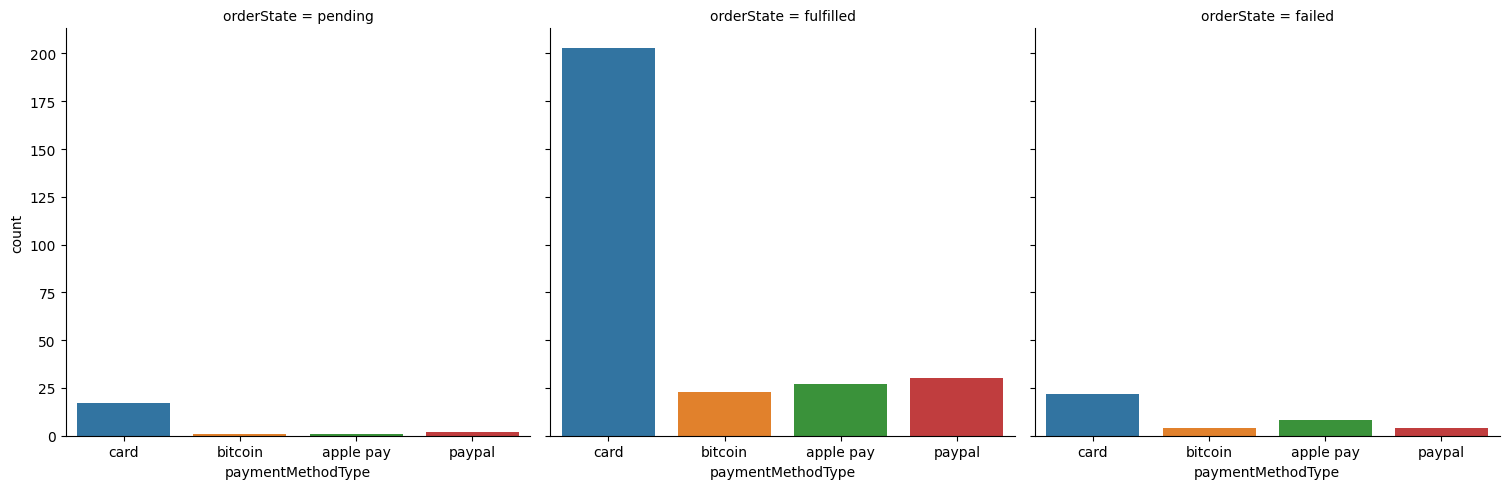

In [14]:
# Análisis de paymentMethodType vs orderState (cat vs cat)

g = sns.catplot(x="paymentMethodType",
                col="orderState",
                data= data,
                kind="count")

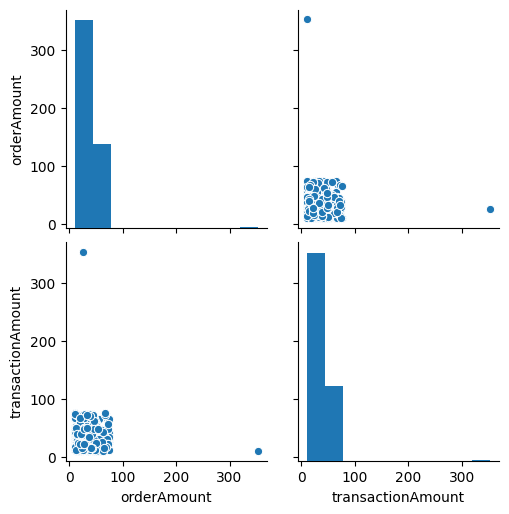

In [15]:
# Analisis de orderAmount vs transactionAmount (num vs num)

data_aux = data[["orderAmount", "transactionAmount"]].copy()

sns.pairplot(data_aux)

array([[<AxesSubplot: title={'center': 'orderAmount'}>,
        <AxesSubplot: title={'center': 'transactionAmount'}>]],
      dtype=object)

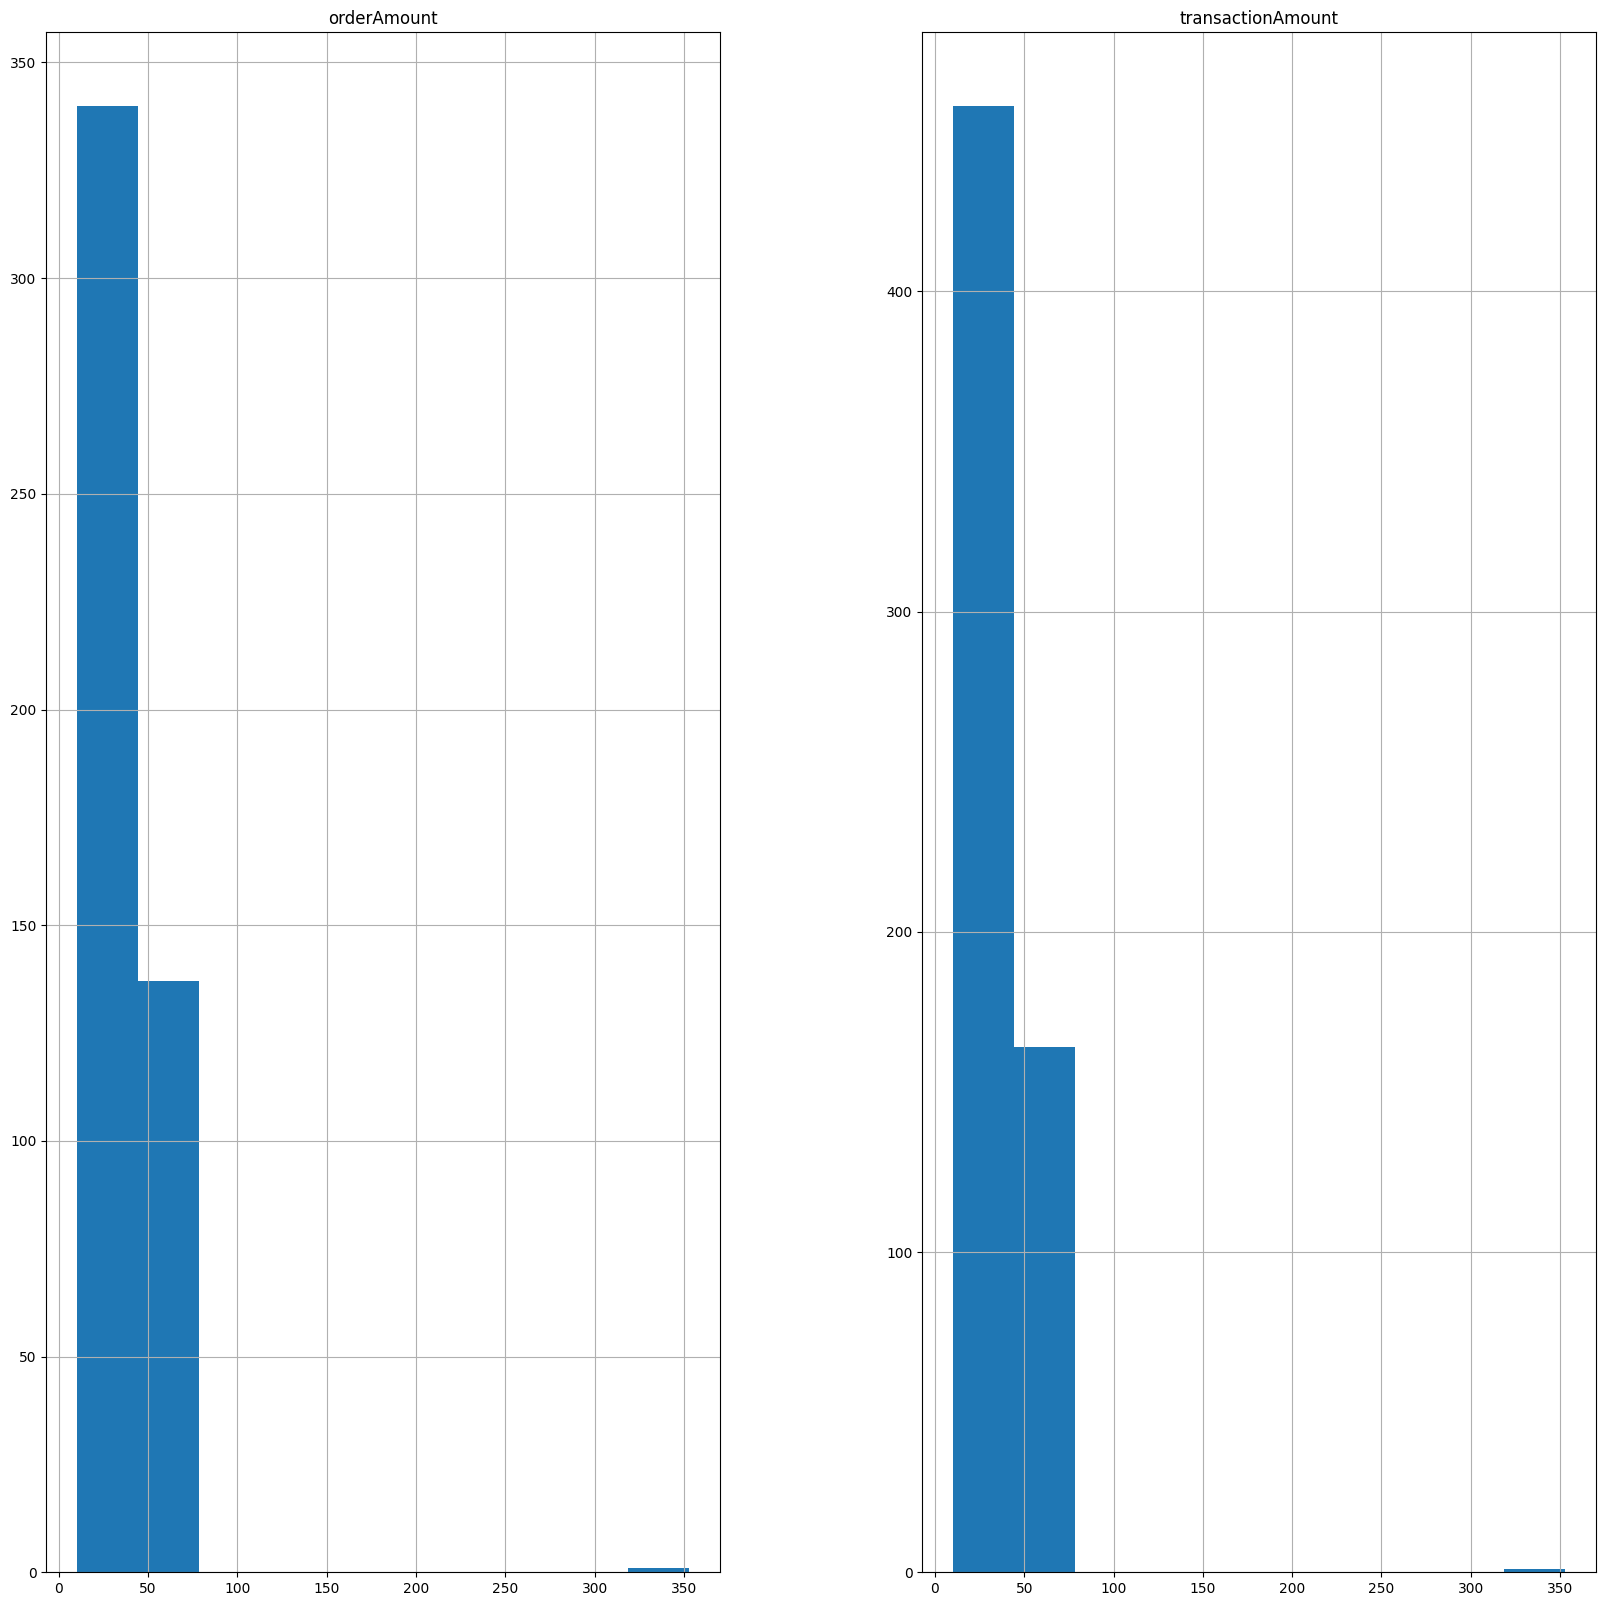

In [16]:
data.hist(figsize = (20, 20))

In [17]:
from funpymodeling import profiling_num

profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,orderAmount,35.606695,21.667298,0.608518,10.0,12.0,22.0,35.0,46.0,67.0,74.00
1,transactionAmount,34.598716,20.360247,0.588468,10.0,12.0,21.0,34.0,45.0,65.0,73.78


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
orderAmount,478.0,35.606695,21.667298,10.0,22.0,35.0,46.0,353.0
transactionAmount,623.0,34.598716,20.360247,10.0,21.0,34.0,45.0,353.0


In [19]:
# from ydataprofiling import ProfileReport

# data2=pd.get_dummies(data, dummy_na=True)

# vars_to_drop=status(data2).query("unique<=1")['variable']
# data3=data2.drop(vars_to_drop, axis=1)

# sns.pairplot(data)

In [20]:
data2=pd.get_dummies(data, dummy_na=True)

# usaré data2 para hacer el coolwarm map

data2

,orderAmount,transactionAmount,transactionFailed,orderState_failed,orderState_fulfilled,orderState_pending,orderState_nan,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodRegistrationFailure_nan,...,emailProvider_weird,emailProvider_yahoo,emailProvider_nan,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_numbers,customerIPAddressSimplified_nan,sameCity_no,sameCity_unknown,sameCity_yes,sameCity_nan
0,18.0,18,False,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,26.0,26,False,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,45.0,45,False,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3,23.0,23,False,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
4,43.0,43,True,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,25,True,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
619,NaN,25,True,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
620,NaN,25,False,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
621,NaN,19,False,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


# CORRELACIÓN 🤯

<AxesSubplot: >

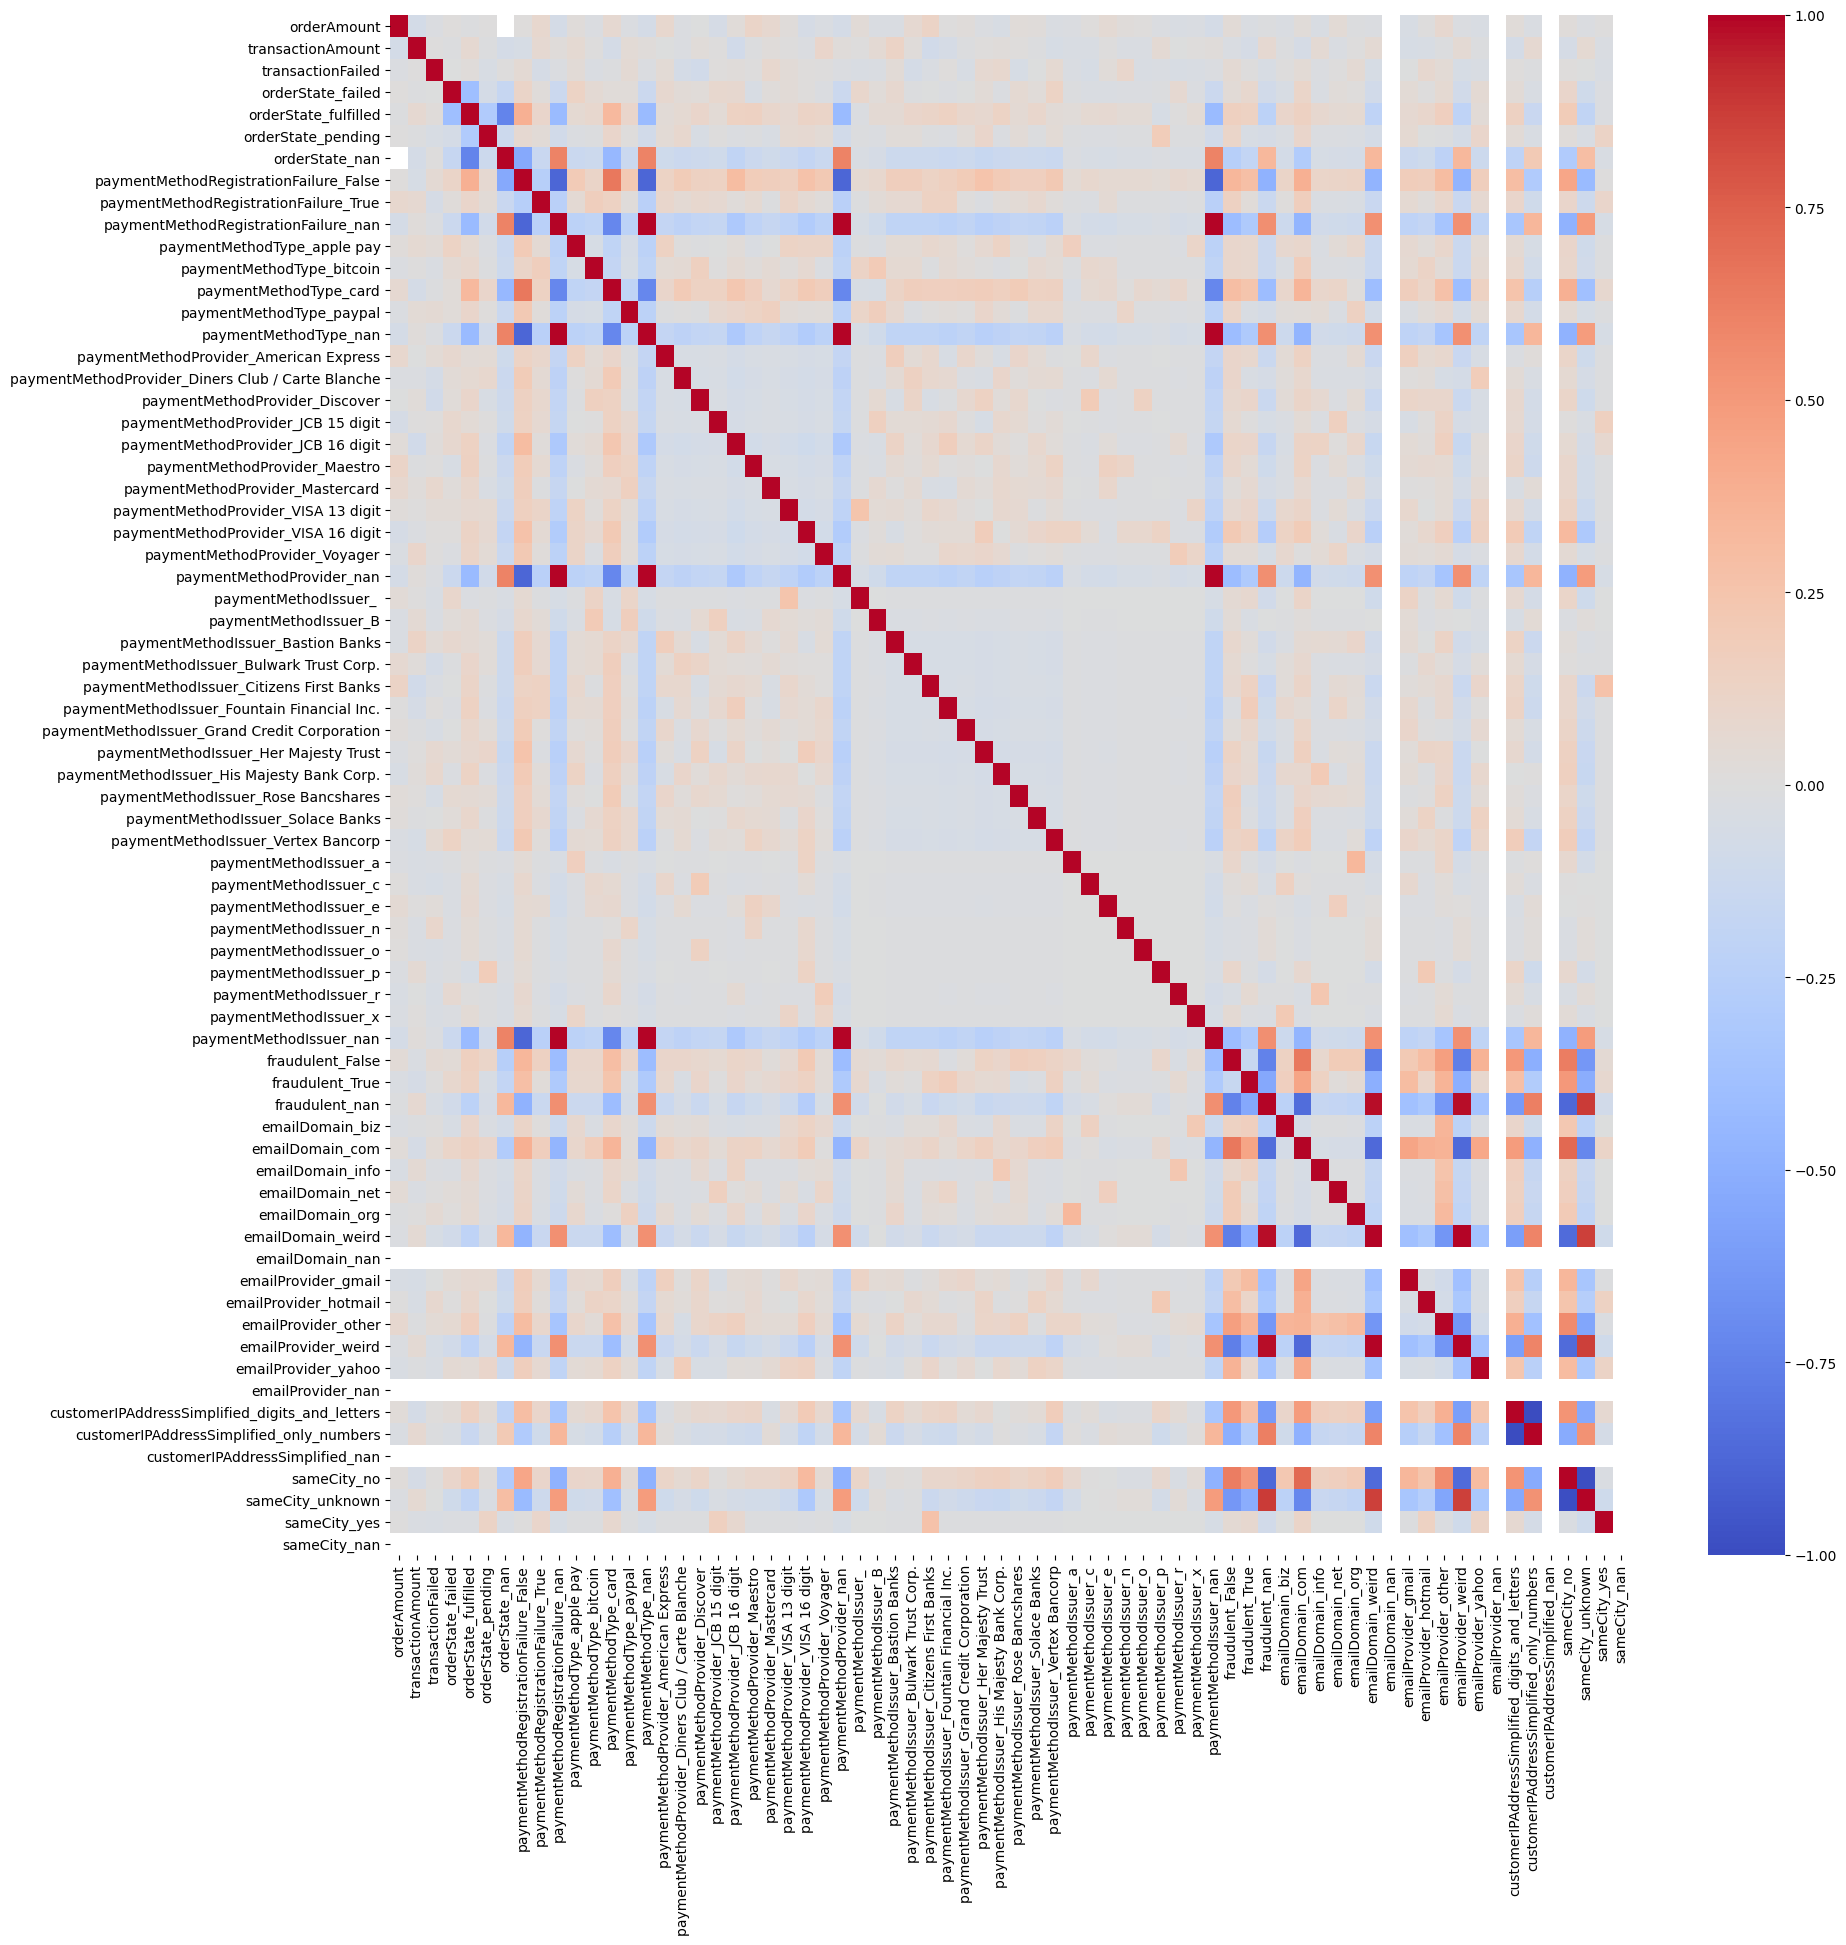

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(data2.corr(), cmap='coolwarm')

In [29]:
pd.crosstab(data2['fraudulent_True'], data2['emailProvider_weird'])

emailProvider_weird,0,1
fraudulent_True,,
0,107,455
1,57,4


In [25]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [31]:
from funpymodeling.exploratory import corr_pair

cor_d=corr_pair(data)

cor_d

c:\Users\facuq\AppData\Local\Programs\Python\Python311\Lib\site-packages\funpymodeling\exploratory.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_cor=data2.corr(method)


,v1,v2,R,R2
1,transactionAmount,orderAmount,-0.077408,0.005992
2,transactionFailed,orderAmount,-0.016296,0.000266
3,orderAmount,transactionAmount,-0.077408,0.005992
5,transactionFailed,transactionAmount,0.002385,0.000006
6,orderAmount,transactionFailed,-0.016296,0.000266
7,transactionAmount,transactionFailed,0.002385,0.000006


In [32]:
cor_d2=corr_pair(data2)

cor_d2

,v1,v2,R,R2
1,transactionAmount,orderAmount,-0.077408,5.991921e-03
2,transactionFailed,orderAmount,-0.016296,2.655595e-04
3,orderState_failed,orderAmount,0.013475,1.815663e-04
4,orderState_fulfilled,orderAmount,-0.011686,1.365619e-04
5,orderState_pending,orderAmount,0.000828,6.861575e-07
...,...,...,...,...
4894,customerIPAddressSimplified_only_numbers,sameCity_nan,NaN,NaN
4895,customerIPAddressSimplified_nan,sameCity_nan,NaN,NaN
4896,sameCity_no,sameCity_nan,NaN,NaN
4897,sameCity_unknown,sameCity_nan,NaN,NaN


In [ ]:
# !pip install minepy

# from minepy import MINE

# 2do calculo de los estadísticos
# mine.compute_score(data['transactionAmount'], data['transactionFailed'])

INSIGHTS:

1) El 70% de las compras de las que conocemos el tipo de método de pago, fueron hechas con tarjeta de crédito.
2) El 36% de las compras que sabemos si fueron o no fraudulentas, fueron fraudulentas.
3) El 38% de las compras con tarjeta de crédito han sido fraudulentas.
4) Order Amount y Transaction Amount tiene outliers entre 300 y 350 aprox (rows que podría eliminar, si son pocos).
5) Existe una gran correlación entre Email Provider weird e Email Domain weird.
